In [1]:
# импорт зависимосте

import pandas as pd
import numpy as np
import xarray as xr


In [2]:
# Data source selection
SOURCE = "idl_unet"  # "qlook" or "idl_unet"
QLOOK_PATH = "./Data/qlook-data (2017).txt"
IDL_UNET_PATH = "Outputs/V IDL vs U-Net.parquet"
TARGET_FREQ = "1h"  # set to None to skip resampling


def _coerce_datetime_index(df):
    if isinstance(df.index, pd.DatetimeIndex):
        return df

    if "time" in df.columns:
        df = df.copy()
        df.index = pd.to_datetime(df["time"], errors="coerce")
        return df

    if "date" in df.columns:
        df = df.copy()
        df.index = pd.to_datetime(df["date"], errors="coerce")
        return df

    raw = pd.Series(df.index.astype(str))
    dt_direct = pd.to_datetime(raw, format="%Y%m%d_%H%M", errors="coerce")
    dt_direct_s = pd.to_datetime(raw, format="%Y%m%d_%H%M%S", errors="coerce")
    dt_guess = pd.to_datetime(raw, errors="coerce")
    dt = dt_direct.fillna(dt_direct_s).fillna(dt_guess)

    df = df.copy()
    df.index = pd.to_datetime(dt).to_numpy()
    return df


def load_sw_source(source):
    if source == "qlook":
        df = pd.read_csv(
            QLOOK_PATH,
            index_col=0,
            skiprows=4,
            header=None,
            names=["s", "v"],
        )
        df.index = df.index.map(pd.Timestamp)
        df["v"] = df["v"].astype(str).str.strip()
        df["v"] = df["v"].replace("N/A", 0).astype(float)
        df = df.dropna()
    elif source == "idl_unet":
        df = pd.read_parquet(IDL_UNET_PATH)
        if "v" not in df.columns:
            df = df.copy()
            df["v"] = df["v_idl"]
        df = _coerce_datetime_index(df)
        df = df.dropna(subset=["v"])
    else:
        raise ValueError("SOURCE must be 'qlook' or 'idl_unet'.")

    df = df[~df.index.isna()].sort_index()
    if TARGET_FREQ:
        df = df.resample(TARGET_FREQ).nearest()
    return df


In [3]:
df_v = load_sw_source(SOURCE)
df_v


/var/folders/3z/b4fclst96kbd90mb019v618m0000gn/T/ipykernel_883/1522610099.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt_guess = pd.to_datetime(raw, errors="coerce")


,fits_path,mask_path,hmi_path,v_idl,v_ch,v
2017-01-01 00:00:00,/Volumes/JetDrive 330/mnt~sun/FITS/2017/01/01/...,/Volumes/JetDrive 330/mnt~sun/Masks/2017/01/AI...,None,0.008715,0.009397,0.008715
2017-01-01 01:00:00,/Volumes/JetDrive 330/mnt~sun/FITS/2017/01/01/...,/Volumes/JetDrive 330/mnt~sun/Masks/2017/01/AI...,None,0.008715,0.009397,0.008715
2017-01-01 02:00:00,/Volumes/JetDrive 330/mnt~sun/FITS/2017/01/01/...,/Volumes/JetDrive 330/mnt~sun/Masks/2017/01/AI...,None,0.008715,0.009397,0.008715
2017-01-01 03:00:00,/Volumes/JetDrive 330/mnt~sun/FITS/2017/01/01/...,/Volumes/JetDrive 330/mnt~sun/Masks/2017/01/AI...,/Volumes/JetDrive 330/mnt~sun/HMI/2017/hmi.M_7...,0.012994,0.014481,0.012994
2017-01-01 04:00:00,/Volumes/JetDrive 330/mnt~sun/FITS/2017/01/01/...,/Volumes/JetDrive 330/mnt~sun/Masks/2017/01/AI...,/Volumes/JetDrive 330/mnt~sun/HMI/2017/hmi.M_7...,0.012994,0.014481,0.012994
...,...,...,...,...,...,...
2017-02-28 19:00:00,/Volumes/JetDrive 330/mnt~sun/FITS/2017/02/28/...,/Volumes/JetDrive 330/mnt~sun/Masks/2017/02/AI...,/Volumes/JetDrive 330/mnt~sun/HMI/2017/hmi.M_7...,0.019074,0.020539,0.019074
2017-02-28 20:00:00,/Volumes/JetDrive 330/mnt~sun/FITS/2017/02/28/...,/Volumes/JetDrive 330/mnt~sun/Masks/2017/02/AI...,/Volumes/JetDrive 330/mnt~sun/HMI/2017/hmi.M_7...,0.019074,0.020539,0.019074
2017-02-28 21:00:00,/Volumes/JetDrive 330/mnt~sun/FITS/2017/02/28/...,/Volumes/JetDrive 330/mnt~sun/Masks/2017/02/AI...,/Volumes/JetDrive 330/mnt~sun/HMI/2017/hmi.M_7...,0.015959,0.018019,0.015959
2017-02-28 22:00:00,/Volumes/JetDrive 330/mnt~sun/FITS/2017/02/28/...,/Volumes/JetDrive 330/mnt~sun/Masks/2017/02/AI...,/Volumes/JetDrive 330/mnt~sun/HMI/2017/hmi.M_7...,0.015959,0.018019,0.015959


In [4]:
cr_time = 27 * 24 * 3600  # s
omega = 360 / cr_time  # º/s

In [5]:
omega * 3600

0.5555555555555556

In [6]:
phi_step = 3600 * omega
phi_step

0.5555555555555556

In [7]:
r0 = 20
rSolar = 700000  # in meters

In [29]:
v_min = 300
a = 210
alpha = 0.4


def v(s):
    return v_min + a * (s * 100) ** alpha


if SOURCE == "idl_unet":
    df_v = df_v.copy()
    df_v["v"] = v(df_v["v"].astype(float))


In [30]:
# Velocity mapping applied above


Создание мультииндекса: модель данных — трёхмерный массив с индексами [дата, ɸ, R]

In [31]:
def make_field(A, B, phi_step=phi_step, R_start=20, R_stop=215, R_step=1):
    """
    A, B: date-like (e.g. '2025-09-01', pd.Timestamp)
    phi_step: step size in degrees for phi (0 .. 360)
    R_*: radius range and step (inclusive of R_stop if it lands exactly)
    """
    dates = pd.date_range(A, B, freq="1H")

    # Phi: 0 to 360 (avoid rounding misses at the endpoint)
    nudge = 1e-12
    phi = np.round(np.arange(0.0, 360, phi_step), 6)

    # R: 20..215 inclusive in steps of R_step
    R = np.arange(R_start, R_stop + nudge, R_step, dtype=int)

    data = np.full((len(dates), len(phi), len(R)), np.nan, dtype=np.float32)
    field = xr.DataArray(
        data,
        coords={"date": dates, "phi": phi, "R": R},
        dims=("date", "phi", "R"),
        name="v_max",
    )
    return field


In [32]:
r0 = 0

In [33]:
field = make_field("2017-01-01 00:00:00.000", "2017-03-01 00:00:00.000", R_start=r0)


/var/folders/3z/b4fclst96kbd90mb019v618m0000gn/T/ipykernel_883/123926113.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(A, B, freq="1H")


In [34]:
dates = field.coords["date"].to_index()


In [35]:
dates_set = set(dates)


In [36]:
delta_hours = np.arange(0, 7 * 24, 1, dtype=int)
delta_seconds = delta_hours * 3600
# Use hour offsets as timedeltas for datetime64 arithmetic
_delta_t = delta_hours.astype("timedelta64[h]")
delta_t = _delta_t.astype("timedelta64[ns]")


def radii_for_speed(v_i, r0=r0):
    return np.round((v_i * delta_seconds + r0 * rSolar) / rSolar).astype(int)


In [37]:
def propagate_times(t0):
    t0_np = np.datetime64(t0, "ns")
    return t0_np + delta_t


In [38]:
propagate_times("2018-07-01T18:00:00")


array(['2018-07-01T18:00:00.000000000', '2018-07-01T19:00:00.000000000',
       '2018-07-01T20:00:00.000000000', '2018-07-01T21:00:00.000000000',
       '2018-07-01T22:00:00.000000000', '2018-07-01T23:00:00.000000000',
       '2018-07-02T00:00:00.000000000', '2018-07-02T01:00:00.000000000',
       '2018-07-02T02:00:00.000000000', '2018-07-02T03:00:00.000000000',
       '2018-07-02T04:00:00.000000000', '2018-07-02T05:00:00.000000000',
       '2018-07-02T06:00:00.000000000', '2018-07-02T07:00:00.000000000',
       '2018-07-02T08:00:00.000000000', '2018-07-02T09:00:00.000000000',
       '2018-07-02T10:00:00.000000000', '2018-07-02T11:00:00.000000000',
       '2018-07-02T12:00:00.000000000', '2018-07-02T13:00:00.000000000',
       '2018-07-02T14:00:00.000000000', '2018-07-02T15:00:00.000000000',
       '2018-07-02T16:00:00.000000000', '2018-07-02T17:00:00.000000000',
       '2018-07-02T18:00:00.000000000', '2018-07-02T19:00:00.000000000',
       '2018-07-02T20:00:00.000000000', '2018-07-02

In [39]:
# # df = pd.read_parquet("./Outputs/Propagated SW.parquet")

# for t0 in df_v.index:
#     v_i = df_v.loc[t0].v

#     # -----------------------------------------------------
#     # phi = 0 for a given SW speed @ sun
#     v_p_arr = propagate_speed(
#         v_i,
#         t0,
#     )

#     for t in v_p_arr.index:
#         if (v_p_arr.loc[t].R <= 215) and t in dates:
#             # print(df.loc[(t, 0.0, v1.loc[t].R)])
#             df.loc[(t, 0, v_p_arr.loc[t].R)]["v"] = df.loc[(t, 0, v_p_arr.loc[t].R)][
#                 "v"
#             ] + [v_i]

#     # -----------------------------------------------------
#     # phi > 0, t = t0 + delta_t
#     for phi in np.arange(0, 360, phi_step):
#         t = t0 + pd.Timedelta(seconds=phi / omega).round("1h")
#         v_p_arr = propagate_speed(
#             v_i,
#             t,
#         )

#         for t in v_p_arr.index:
#             if (v_p_arr.loc[t].R <= 215) and t in dates:
#                 # print(df.loc[(t, phi, v1.loc[t].R)])
#                 df.loc[(t, phi, v_p_arr.loc[t].R)]["v"] = df.loc[
#                     (t, phi, v_p_arr.loc[t].R)
#                 ]["v"] + [v_i]

In [40]:
from tqdm.auto import tqdm

date_axis = field.coords["date"].values.astype("datetime64[ns]")
phi_values = field.coords["phi"].values
phi_hour_offsets = np.round(phi_values / (omega * 3600)).astype(int)

R_coords = field.coords["R"].values
R_min = int(R_coords[0])
R_max = int(R_coords[-1])
R_step = int(R_coords[1] - R_coords[0]) if len(R_coords) > 1 else 1

data = field.values

t0s = df_v.index.values
dvs = df_v["v"].values

for t0, v_i in tqdm(zip(t0s, dvs), total=len(dvs), desc="propagate"):
    if not np.isfinite(v_i):
        continue
    t0_np = np.datetime64(t0, "ns")

    R_arr = radii_for_speed(v_i, r0=r0)
    r_mask = (R_arr >= R_min) & (R_arr <= R_max)
    if not np.any(r_mask):
        continue

    R_arr = R_arr[r_mask]
    dt_arr_base = (t0_np + delta_t)[r_mask]

    for phi_idx, hour_offset in enumerate(phi_hour_offsets):
        dt_arr = dt_arr_base + np.timedelta64(int(hour_offset), "h")
        idx = np.searchsorted(date_axis, dt_arr)
        in_bounds = idx < len(date_axis)
        if not np.any(in_bounds):
            continue

        idx_in = idx[in_bounds]
        dt_in = dt_arr[in_bounds]
        R_in = R_arr[in_bounds]
        exact = date_axis[idx_in] == dt_in
        if not np.any(exact):
            continue

        idx = idx_in[exact]
        R_valid = R_in[exact]
        k = ((R_valid - R_min) // R_step).astype(int)

        existing = data[idx, phi_idx, k]
        update = np.where(np.isnan(existing) | (v_i > existing), v_i, existing)
        data[idx, phi_idx, k] = update


propagate:   0%|          | 0/1416 [00:00<?, ?it/s]

In [41]:
# Field overview
field
coverage = np.isfinite(field.values).mean()
print(f"Coverage: {coverage:.2%} of cells have values")


Coverage: 1.12% of cells have values


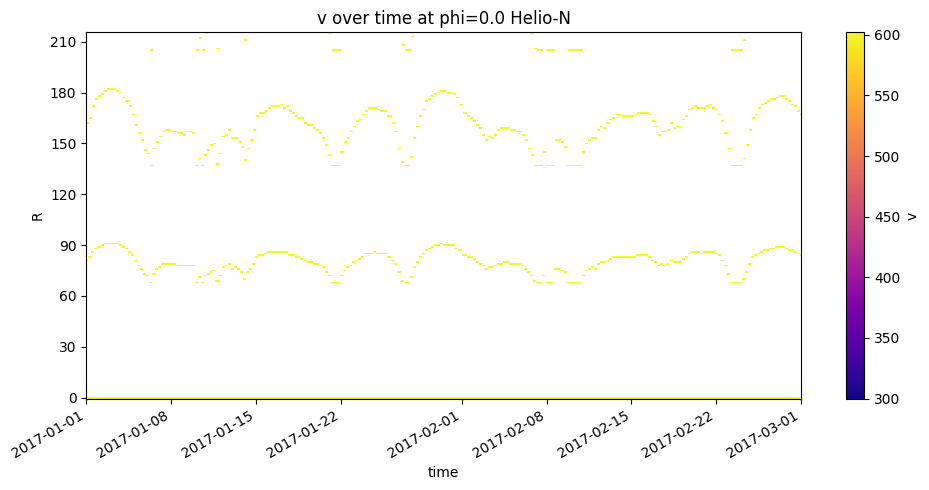

In [42]:
# Time vs R heatmap at fixed phi
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

if "vmin" not in globals() or "vmax" not in globals():
    flat = field.values.ravel()
    flat = flat[np.isfinite(flat)]
    if flat.size:
        vmin = float(np.percentile(flat, 5))
        vmax = float(np.percentile(flat, 95))
    else:
        vmin, vmax = 0.0, 1.0

phi_fixed = 0.0
slice_da = field.sel(phi=phi_fixed, method="nearest")
vals = slice_da.values  # (date, R)

# Mask invalid values
vals = np.ma.masked_invalid(vals)

times = slice_da.coords["date"].to_index()
R = slice_da.coords["R"].values

fig, ax = plt.subplots(figsize=(10, 5))
mesh = ax.pcolormesh(times, R, vals.T, shading="nearest", cmap="plasma", vmin=vmin, vmax=vmax)
fig.colorbar(mesh, ax=ax, label="v")
ax.set_title(f"v over time at phi={phi_fixed} Helio-N")
ax.set_xlabel("time")
ax.set_ylabel("R")
ax.yaxis.set_major_locator(plt.MaxNLocator(8))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


In [43]:
field_unet = field.copy()

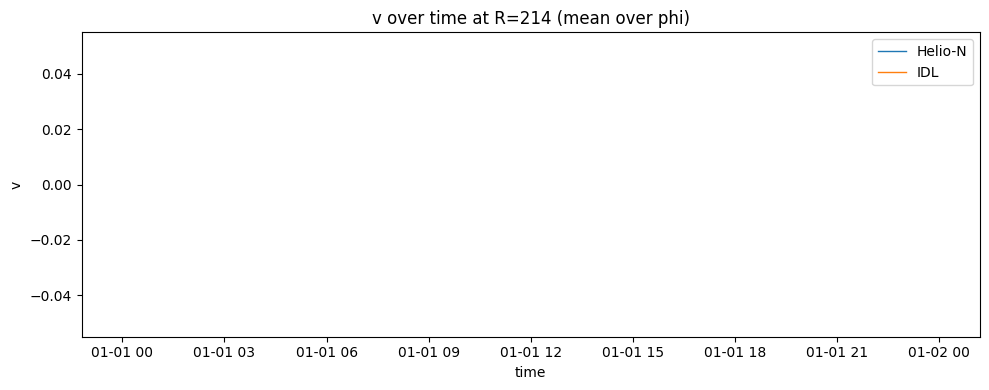

In [44]:
import matplotlib.pyplot as plt

R_pick = 214
series = field_unet.sel(R=R_pick, method="nearest").mean(dim="phi").to_series()
series1 = field.sel(R=R_pick, method="nearest").mean(dim="phi").to_series()
series = series.dropna()
series1 = series.dropna()

plt.figure(figsize=(10, 4))
plt.plot(series.index, series.values, linewidth=1, label="Helio-N")
plt.plot(series1.index, series1.values, linewidth=1, label="IDL")
plt.title(f"v over time at R={R_pick} (mean over phi)")
plt.xlabel("time")
plt.ylabel("v")
plt.legend()
plt.tight_layout()
plt.show()


In [45]:
# Global color limits (robust percentiles)
flat = field.values.ravel()
flat = flat[np.isfinite(flat)]
if flat.size:
    vmin = float(np.percentile(flat, 5))
    vmax = float(np.percentile(flat, 95))
else:
    vmin, vmax = 0.0, 1.0
vmin, vmax


(13273.8173828125, 17528.734375)

In [46]:
# Quick slice preview
field.isel(date=slice(0, 2))


<xarray.DataArray 'v_max' (date: 2, phi: 648, R: 216)> Size: 1MB
array([[[15704.998,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[15704.998,       nan,       nan, ...,       nan,       nan,
               nan],
        [15704.998,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * date     (date) datetime64[ns] 16B 2017-01-01 2017-01-01T01:00:00
  * phi      (phi) float64 5kB 0.0 0.5556 1.111 1.667 ... 358.3 358.9 359.4
  * R        (R) int64 2kB 0 1 2 3 4 5 6 7 8 ... 208 209 210 211 212 213 214 215

In [47]:
from ipywidgets import interact, widgets
import matplotlib.pyplot as plt
import numpy as np

if "vmin" not in globals() or "vmax" not in globals():
    flat = field.values.ravel()
    flat = flat[np.isfinite(flat)]
    if flat.size:
        vmin = float(np.percentile(flat, 5))
        vmax = float(np.percentile(flat, 95))
    else:
        vmin, vmax = 0.0, 1.0

# prepare date options (strings for the slider)
dates = list(field.coords["date"].to_index())
date_strs = [d.strftime("%Y-%m-%d %H:%M:%S") for d in dates]

r_min = int(field.coords["R"].values.min())
r_max = int(field.coords["R"].values.max())

r_slider = widgets.IntRangeSlider(
    value=(r_min, r_max),
    min=r_min,
    max=r_max,
    step=5,
    description="R range",
    continuous_update=False,
)

auto_limits = widgets.Checkbox(value=True, description="auto vmin/vmax")


def plot_polar(date_str, r_range, auto_limits):
    d = pd.Timestamp(date_str)
    if d not in dates:
        print("No data for", date_str)
        return

    slice_da = field.sel(date=d)
    r0, r1 = r_range
    slice_da = slice_da.sel(R=slice(r0, r1))

    vals = slice_da.values
    if not np.isfinite(vals).any():
        print("No v values for", date_str)
        return

    phi = slice_da.coords["phi"].values
    R = slice_da.coords["R"].values
    Phi, Rgrid = np.meshgrid(phi, R, indexing="ij")

    vals = np.ma.masked_invalid(vals)

    if auto_limits:
        flat = vals.compressed()
        if flat.size:
            vmin_local = float(np.percentile(flat, 5))
            vmax_local = float(np.percentile(flat, 95))
        else:
            vmin_local, vmax_local = vmin, vmax
    else:
        vmin_local, vmax_local = vmin, vmax

    plt.figure(figsize=(6, 6))
    ax = plt.subplot(projection="polar")
    sc = ax.pcolormesh(
        np.deg2rad(Phi),
        Rgrid,
        vals,
        shading="nearest",
        cmap="plasma",
        vmin=vmin_local,
        vmax=vmax_local,
    )
    cb = plt.colorbar(sc, pad=0.1)
    cb.set_label("v")
    ax.set_title(f"{d}")
    plt.show()


# interact(
#     plot_polar,
#     date_str=widgets.SelectionSlider(options=date_strs, description="date"),
#     r_range=r_slider,
#     auto_limits=auto_limits,
# )


/var/folders/3z/b4fclst96kbd90mb019v618m0000gn/T/ipykernel_883/1522610099.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt_guess = pd.to_datetime(raw, errors="coerce")


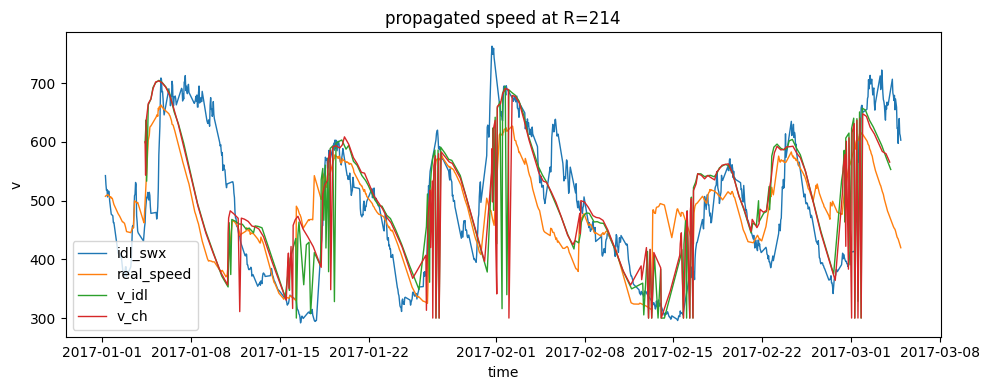

In [48]:
# Compare propagated speeds at R=214 (all sources)
R_target = 214


def propagate_series_to_radius(series, R_target, r0=r0):
    series = series.astype(float).replace([np.inf, -np.inf], np.nan)
    series = series[series > 0].dropna()
    if series.empty:
        return series

    t0 = series.index
    vvals = series.values
    dt_sec = ((R_target - r0) * rSolar) / vvals
    finite = np.isfinite(dt_sec)
    if not np.any(finite):
        return series.iloc[0:0]

    dt_sec = dt_sec[finite]
    t0 = t0[finite]
    vvals = vvals[finite]

    t_arr = pd.to_timedelta(dt_sec, unit="s") + t0
    t_arr = t_arr.round("1h")
    out = pd.DataFrame({"t": t_arr, "v": vvals})
    return out.groupby("t")["v"].max().sort_index()


def _load_qlook():
    df = pd.read_csv(
        QLOOK_PATH,
        index_col=0,
        skiprows=4,
        header=None,
        names=["s", "v"],
        na_values=["N/A", "NA", "nan", "NaN", "INF", "inf", "-inf"],
    )
    df.index = pd.to_datetime(df.index, errors="coerce")
    df["s"] = pd.to_numeric(df["s"], errors="coerce")
    df["v"] = pd.to_numeric(df["v"], errors="coerce")
    df = df.replace([np.inf, -np.inf], np.nan)
    return df.dropna()


def _load_idl_unet():
    df = pd.read_parquet(IDL_UNET_PATH)
    df = _coerce_datetime_index(df)
    return df


series_map = {}

try:
    qlook_df = _load_qlook()
    series_map["idl_swx"] = qlook_df["s"].astype(float).replace([np.inf, -np.inf], np.nan).dropna()
    series_map["real_speed"] = qlook_df["v"].astype(float).replace([np.inf, -np.inf], np.nan).dropna()
except Exception as e:
    print(f"qlook load failed: {e}")

try:
    idl_df = _load_idl_unet()
    if "v_idl" in idl_df.columns:
        series_map["v_idl"] = propagate_series_to_radius(v(idl_df["v_idl"]), R_target)
    if "v_ch" in idl_df.columns:
        series_map["v_ch"] = propagate_series_to_radius(v(idl_df["v_ch"]), R_target)
    elif "v_unet" in idl_df.columns:
        series_map["v_unet"] = propagate_series_to_radius(v(idl_df["v_unet"]), R_target)
except Exception as e:
    print(f"idl/unet load failed: {e}")

if not series_map:
    print("No series available to plot.")
else:
    plt.figure(figsize=(10, 4))
    for label, series in series_map.items():
        plt.plot(series.index, series.values, label=label, linewidth=1)
    plt.title(f"propagated speed at R={R_target}")
    plt.xlabel("time")
    plt.ylabel("v")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [49]:
# Compare which model is closer to real_speed (qlook) at R=214
R_target = 214

def _load_qlook():
    df = pd.read_csv(
        QLOOK_PATH,
        index_col=0,
        skiprows=4,
        header=None,
        names=["s", "v"],
        na_values=["N/A", "NA", "nan", "NaN", "INF", "inf", "-inf"],
    )
    df.index = pd.to_datetime(df.index, errors="coerce")
    df["s"] = pd.to_numeric(df["s"], errors="coerce")
    df["v"] = pd.to_numeric(df["v"], errors="coerce")
    df = df.replace([np.inf, -np.inf], np.nan)
    return df.dropna()

def _load_idl_unet():
    df = pd.read_parquet(IDL_UNET_PATH)
    df = _coerce_datetime_index(df)
    return df

def propagate_series_to_radius(series, R_target, r0=r0):
    series = series.astype(float).replace([np.inf, -np.inf], np.nan)
    series = series[series > 0].dropna()
    if series.empty:
        return series
    t0 = series.index
    vvals = series.values
    dt_sec = ((R_target - r0) * rSolar) / vvals
    finite = np.isfinite(dt_sec)
    if not np.any(finite):
        return series.iloc[0:0]
    dt_sec = dt_sec[finite]
    t0 = t0[finite]
    vvals = vvals[finite]
    t_arr = pd.to_timedelta(dt_sec, unit="s") + t0
    t_arr = t_arr.round("1h")
    out = pd.DataFrame({"t": t_arr, "v": vvals})
    return out.groupby("t")["v"].max().sort_index()

qlook_df = _load_qlook()
real_speed = qlook_df["v"].astype(float)

idl_df = _load_idl_unet()

candidates = {}
if "v_idl" in idl_df.columns:
    candidates["v_idl"] = propagate_series_to_radius(v(idl_df["v_idl"]), R_target)
if "v_ch" in idl_df.columns:
    candidates["v_ch"] = propagate_series_to_radius(v(idl_df["v_ch"]), R_target)
if "v_unet" in idl_df.columns:
    candidates["v_unet"] = propagate_series_to_radius(v(idl_df["v_unet"]), R_target)

# align to hourly, compare to real_speed
real_hourly = real_speed.resample("1h").mean()

rows = []
for name, series in candidates.items():
    cand_hourly = series.resample("1h").mean()
    aligned = pd.concat([real_hourly, cand_hourly], axis=1, join="inner")
    aligned.columns = ["real", "cand"]
    aligned = aligned.dropna()
    if aligned.empty:
        continue
    diff = aligned["cand"] - aligned["real"]
    mae = float(np.mean(np.abs(diff)))
    rmse = float(np.sqrt(np.mean(diff**2)))
    corr = float(aligned["cand"].corr(aligned["real"]))
    rows.append({"name": name, "mae": mae, "rmse": rmse, "corr": corr, "n": len(aligned)})

result = pd.DataFrame(rows).sort_values("mae")
result


/var/folders/3z/b4fclst96kbd90mb019v618m0000gn/T/ipykernel_883/1522610099.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt_guess = pd.to_datetime(raw, errors="coerce")


,name,mae,rmse,corr,n
1,v_ch,52.403523,76.503241,0.683794,144
0,v_idl,63.292585,92.739182,0.547586,146


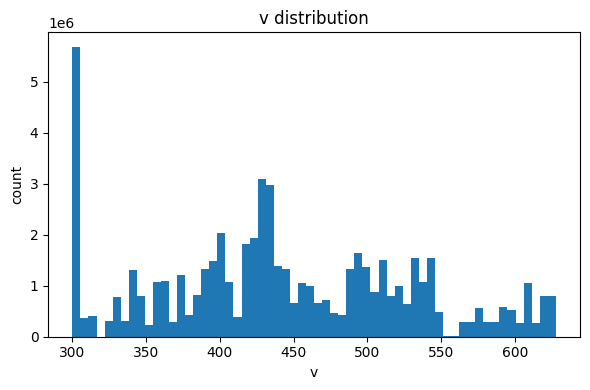

In [29]:
# Histogram of v values
vals = field.values
vals = vals[np.isfinite(vals)]
plt.figure(figsize=(6, 4))
plt.hist(vals, bins=60)
plt.title("v distribution")
plt.xlabel("v")
plt.ylabel("count")
plt.tight_layout()
plt.show()


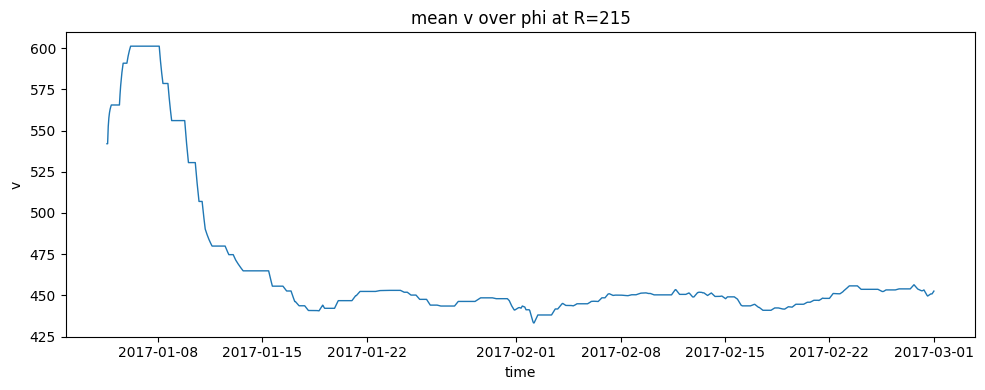

In [30]:
# Mean v over phi at a fixed R
R_pick = 215
series = field.sel(R=R_pick, method="nearest").mean(dim="phi").to_series()
series = series.dropna()

plt.figure(figsize=(10, 4))
plt.plot(series.index, series.values, linewidth=1)
plt.title(f"mean v over phi at R={R_pick}")
plt.xlabel("time")
plt.ylabel("v")
plt.tight_layout()
plt.show()


In [31]:
field.to_netcdf("./Outputs/Propagated SW.nc")
